# LP1.

In [1]:
!pip install sympy==1.10.1

import sympy as sym
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from IPython.display import display

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [2]:
plt.rc('figure', figsize = (12, 8))
plt.rc('font', size = 16)

## LP1.1.

In [3]:
x = sym.symbols('x')
f = sym.Function('f')
eq = sym.Eq(f(x), (x**2 + x) * sym.exp(x))

display(eq)

Eq(f(x), (x**2 + x)*exp(x))

In [4]:
sol = sym.diff(eq.rhs, x, 17)
sol = sym.simplify(sol)

display(sol)

(x**2 + 35*x + 289)*exp(x)

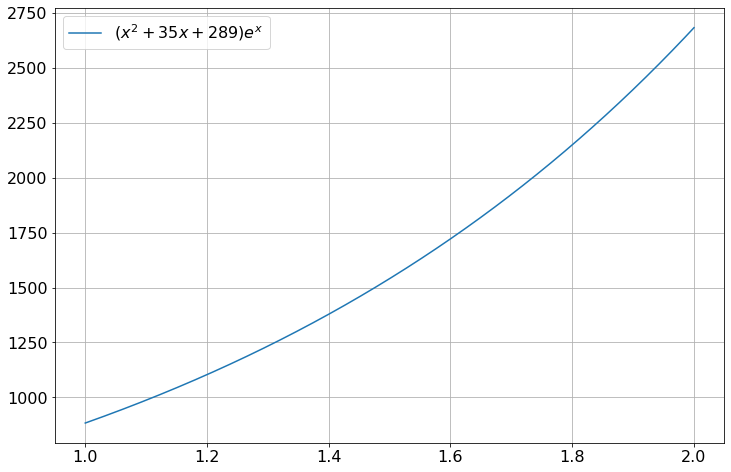

In [5]:
xs = np.linspace(1, 2, 1000)
ff = np.vectorize(sym.lambdify(x, sol))

plt.plot(xs, ff(xs), label=f'${sym.latex(sol)}$')
plt.legend()
plt.grid()

## Lp1.2.

In [6]:
t = sym.symbols('t')
x = sym.Function('x')

In [7]:
eqs = [None]*3
eqs[0] = sym.Eq(sym.Derivative(x(t), t),
                sym.exp(2*t-x(t)))
eqs[1] = sym.Eq(sym.Derivative(x(t), t),
                -sym.sqrt(3)*t**2 + 2*x(t))
eqs[2] = sym.Eq(sym.Derivative(x(t), t),
                ((t/20) + x(t)) / (x(t)-t))

for eq in eqs:
    display(eq)

Eq(Derivative(x(t), t), exp(2*t - x(t)))

Eq(Derivative(x(t), t), -sqrt(3)*t**2 + 2*x(t))

Eq(Derivative(x(t), t), (t/20 + x(t))/(-t + x(t)))

In [8]:
sols = [None]*3

for i, eq in enumerate(eqs):
    sols[i] = sym.dsolve(eq)

for sol in sols:
    display(sol)

Eq(x(t), log(C1 + exp(2*t)/2))

Eq(x(t), C1*exp(2*t) + sqrt(3)*t**2/2 + sqrt(3)*t/2 + sqrt(3)/4)

[Eq(x(t), t - sqrt(C1 + 105*t**2)/10), Eq(x(t), t + sqrt(C1 + 105*t**2)/10)]

In [9]:
for i in range(2):
    sol = sols[i].rhs
    const = sym.solve(sol.subs(t, 1)-2, symbols='C1', dict=True)
    sols[i] = sol.subs(const[0])

    display(sols[i])

log(exp(2*t)/2 + exp(2)/2)

sqrt(3)*t**2/2 + sqrt(3)*t/2 + (8 - 5*sqrt(3))*exp(-2)*exp(2*t)/4 + sqrt(3)/4

In [10]:
for i in range(2):
    sol = sols[2][i].rhs
    const = sym.solve(sol.subs(t, 1)-2, symbols='C1', dict=True)
    if not const:
        continue

    sol = sol.subs(const[0])
    sols[2] = sol

display(sols[2])

t + sqrt(105*t**2 - 5)/10

In [11]:
for i in range(3):
    sols[i] = sym.simplify(sols[i])
    display(sols[i])

log(exp(2*t)/2 + exp(2)/2)

(sqrt(3)*(2*t**2 + 2*t + 1)*exp(2) + (8 - 5*sqrt(3))*exp(2*t))*exp(-2)/4

t + sqrt(105*t**2 - 5)/10

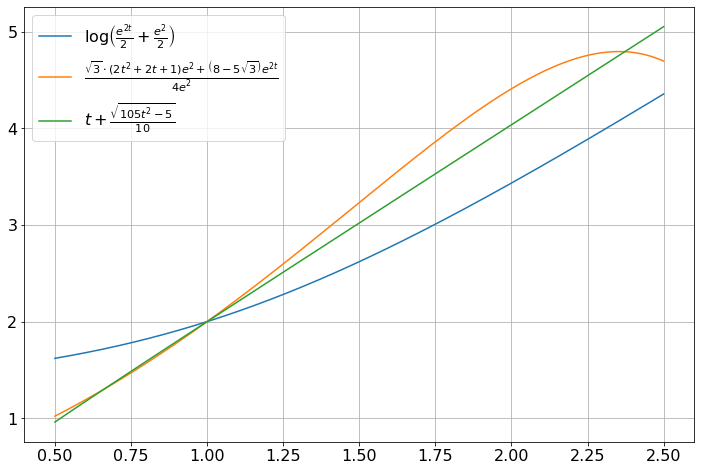

In [12]:
xs = np.linspace(0.5, 2.5, 1000)
for sol in sols:
    ff = np.vectorize(sym.lambdify(t, sol))
    plt.plot(xs, ff(xs), label=f'${sym.latex(sol)}$')

plt.legend()
plt.grid()